In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def odds(p):
    return p/(1-p)

In [3]:
odds(0.25)

0.3333333333333333

In [4]:
def log_odds(p):
    return np.log(p/(1-p))

In [5]:
log_odds(0.5)

0.0

In [6]:
np.log(0.45) +np.log(0.92)+ np.log(0.95)  # log(x*y*z) = log(x) + log(y) + log(z)

-0.9331825995443732

In [7]:
np.log(0.45*0.92*0.95)

-0.9331825995443731

In [9]:
# Basics - matrix multiplication with numpy
x = np.array([[1,2],[3,4],[5,6]])
m = np.array([3,5])

m = m.reshape((2,1))
y = np.dot(x,m)

print(x.shape, m.shape, y.shape)
print('x-----')
print(x)
print('m-----')
print(m)
print('y-----')
print(y)


(3, 2) (2, 1) (3, 1)
x-----
[[1 2]
 [3 4]
 [5 6]]
m-----
[[3]
 [5]]
y-----
[[13]
 [29]
 [45]]


#### np.random.multivariate_normal: Draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

The mean is a coordinate in N-dimensional space, which represents the location where samples are most likely to be generated. This is analogous to the peak of the bell curve for the one-dimensional or univariate normal distribution.

Covariance indicates the level to which two variables vary together. From the multivariate normal distribution, we draw N-dimensional samples, X = [x_1, x_2, ... x_N]. The covariance matrix element C_{ij} is the covariance of x_i and x_j. The element C_{ii} is the variance of x_i (i.e. its “spread”).

In [10]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

In [11]:
x1

array([[-0.2015173 , -0.68335816],
       [ 0.37451947, -0.82808223],
       [-0.16189468, -1.24710655],
       ...,
       [ 0.68358239,  0.32790575],
       [-1.18059621, -1.24839032],
       [ 0.05648586,  0.10506597]])

In [12]:
x2

array([[-0.71536626,  3.19335079],
       [ 0.50565017,  3.87254139],
       [ 2.17195684,  5.25131939],
       ...,
       [ 2.32559622,  4.18132864],
       [ 0.24707288,  4.22940428],
       [ 1.71902244,  4.82535048]])

In [13]:
# np.vstack -> stacking x1 and x2 vertically (row-wise) into a single array
X = np.vstack((x1, x2))
print(x1.shape,x2.shape,X.shape)
X

(5000, 2) (5000, 2) (10000, 2)


array([[-0.2015173 , -0.68335816],
       [ 0.37451947, -0.82808223],
       [-0.16189468, -1.24710655],
       ...,
       [ 2.32559622,  4.18132864],
       [ 0.24707288,  4.22940428],
       [ 1.71902244,  4.82535048]])

In [14]:
# np.hstack -> stacking x1 and x2 horizontally (column-wise) into a single array
Y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
print(Y.shape)
Y

(10000,)


array([0., 0., 0., ..., 1., 1., 1.])

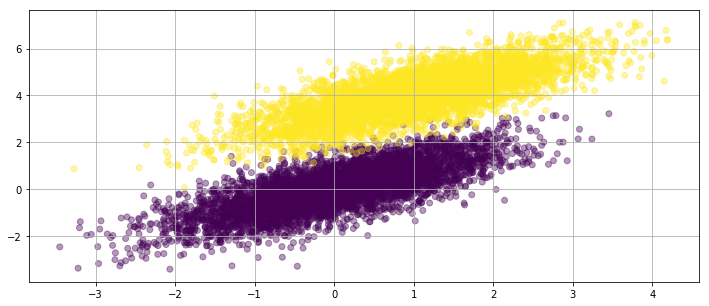

In [15]:
plt.figure(figsize=(12,5))
plt.grid(True)
#plt.scatter(simulated_separable_features[:, 0], simulated_separable_features[:, 1], c = simulated_labels)
plt.scatter(X[:, 0], X[:, 1], c = Y, alpha = 0.4)
plt.show()

In [16]:
def sigmoid(y):
    return 1 / (1 + np.exp(-y))

In [17]:
sigmoid(1000000)

1.0

In [18]:
sigmoid(-1000000)

0.0

In [19]:
sigmoid(-3)

0.04742587317756678

# \begin{equation*} Log Loss = - \sum y_i log(p_i) + (1-y_i) log(1 - p_i)\end{equation*}

In [20]:
def log_loss(features, target, weights):
    log_odds = np.dot(features, weights)
    pred_probs = sigmoid(log_odds)
    ll = -np.sum( target*np.log(pred_probs) + (1-target)*np.log(1-pred_probs))
    return ll

### The derivative(slope/gradient) for Loss function of Logistic Regression is a little simpler:
### \begin{equation*}  = x\times(predictions - actual)  \end{equation*}

In [27]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    print("shape of features, features.T, target, weights:")
    print(features.shape, features.T.shape, target.shape, weights.shape)
    
    for step in range(num_steps):
        
        log_odds = np.dot(features, weights)
        pred_probs = sigmoid(log_odds)

        # Update weights with gradient
        output_error_signal = pred_probs - target 
        gradient = np.dot(features.T, output_error_signal)
        weights -= learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print('Iter:',step,'Loss:',log_loss(features, target, weights))
         
    return weights

In [28]:
weights = logistic_regression(X, Y, num_steps = 50001, learning_rate = 7e-5, add_intercept=True)

shape of features, features.T, target, weights:
(10000, 3) (3, 10000) (10000,) (3,)
Iter: 0 Loss: 4232.832040761654
Iter: 10000 Loss: 145.2732830273145
Iter: 20000 Loss: 141.71631306741472
Iter: 30000 Loss: 141.00757978329875
Iter: 40000 Loss: 140.81456381067866
Iter: 50000 Loss: 140.75504022151685


In [23]:
weights

array([-13.86072153,  -4.97746579,   8.15602333])

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 10**15)
clf.fit(X, Y)

print('Sklearn coeffs: ', clf.intercept_, clf.coef_)
print('Our GrD coeffs: ', weights)

Sklearn coeffs:  [-13.99400825] [[-5.02712589  8.23286817]]
Our GrD coeffs:  [-13.86072153  -4.97746579   8.15602333]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
data_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from Our GrD: {0}'.format((preds == Y).sum() / len(preds)))
print('Accuracy from Sklearn: {0}'.format(clf.score(X, Y)))

Accuracy from Our GrD: 0.9948
Accuracy from Sklearn: 0.9948


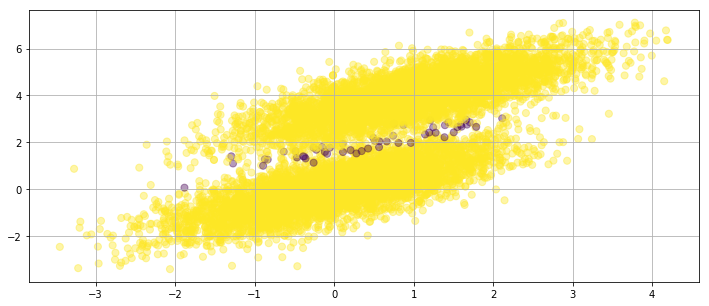

In [26]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1],
            c = preds == Y, alpha = .4, s = 50)
plt.show()